## Import Required Libraries:

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

## We have signal frequencies of 11 subjects, so we have to combine all the csv file into one.

Initially we are reading all csv files.

In [72]:
df1=pd.read_csv('subject1.csv',delimiter=';')

In [73]:
df2=pd.read_csv('subject2.csv',delimiter=';')

In [74]:
df3=pd.read_csv('subject3.csv',delimiter=';')

In [75]:
df4=pd.read_csv('subject4.csv',delimiter=';')

In [76]:
df5=pd.read_csv('subject5.csv',delimiter=';')

In [77]:
df6=pd.read_csv('subject6.csv',delimiter=';')

In [78]:
df7=pd.read_csv('subject7.csv',delimiter=';')

In [79]:
df8=pd.read_csv('subject8.csv',delimiter=';')

In [80]:
df9=pd.read_csv('subject9.csv',delimiter=';')

In [81]:
df10=pd.read_csv('subject10.csv',delimiter=';')

In [82]:
df11=pd.read_csv('subject11.csv',delimiter=';')

In [83]:
# creating list of objects of dataframes.
list=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11]

In [84]:
# combining all dataframe into one
df=pd.concat(list,axis=1)

In [85]:
#printing top five rows
df.head()

,F1,F2,F3,F4,F1,F2,F3,F4,F1,F2,...,F3,F4,F1,F2,F3,F4,F1,F2,F3,F4
0,571,359,646,566,410,316,749,520,450,646,...,534,572,556,500,590,565,881,593,287,660
1,556,347,601,581,513,297,739,509,439,654,...,552,541,572,459,621,565,934,558,313,598
2,537,366,542,558,511,297,738,491,418,703,...,563,545,588,504,617,606,899,437,337,515
3,561,365,552,599,492,273,733,558,397,693,...,535,559,531,510,561,566,701,464,373,571
4,583,343,629,599,472,285,710,555,445,708,...,520,559,571,547,584,522,688,497,317,584


In [86]:
#taking transpose of df.
final=df.T


In [87]:
#Descriptive Statistics For each feature of data set.
final.describe()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,527.795455,525.022727,521.204545,521.636364,519.431818,522.613636,526.386364,521.977273,519.454545,518.500000,...,492.090909,486.909091,496.386364,494.931818,500.772727,497.454545,491.477273,497.068182,493.318182,504.022727
std,173.641381,179.208270,176.886454,165.873739,166.840461,170.963510,172.914176,174.300394,161.954552,156.480402,...,141.898886,145.643211,146.732666,151.517809,144.886782,146.008833,143.766200,143.812280,143.728228,142.397656
min,120.000000,31.000000,25.000000,56.000000,50.000000,93.000000,93.000000,41.000000,49.000000,92.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.750000,436.500000,432.250000,455.250000,443.500000,445.500000,440.250000,439.250000,446.000000,446.500000,...,444.500000,457.250000,472.750000,435.000000,430.500000,463.000000,448.000000,472.500000,453.000000,465.500000
50%,526.500000,530.000000,510.000000,525.000000,508.000000,532.500000,516.500000,507.500000,508.500000,510.500000,...,516.500000,499.500000,517.500000,530.000000,529.000000,518.000000,503.000000,510.500000,505.000000,520.500000
75%,590.750000,574.250000,564.250000,566.500000,583.250000,586.250000,583.250000,573.750000,570.250000,556.000000,...,563.250000,543.500000,551.000000,551.500000,565.750000,561.500000,560.250000,555.750000,545.000000,554.500000
max,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,...,852.000000,835.000000,817.000000,804.000000,775.000000,820.000000,832.000000,809.000000,794.000000,776.000000


In [88]:
#save final data to csv file.
#final.to_csv('D://CdacProject//Combined.csv',index=True)

In [89]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
F1,571,556,537,561,583,547,550,571,555,556,...,531,529,532,533,541,539,561,583,575,567
F2,359,347,366,365,343,339,360,358,368,355,...,355,322,357,375,385,367,354,349,361,356
F3,646,601,542,552,629,604,631,705,551,496,...,532,499,502,549,560,521,508,518,478,508
F4,566,581,558,599,599,525,547,549,545,556,...,529,516,532,572,571,518,517,491,498,537
F1,410,513,511,492,472,451,487,498,499,488,...,564,557,529,538,586,572,560,549,532,576


In [90]:
#printing shape of dataset
final.shape

(44, 4096)

In [91]:
final.info()                           

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, F1 to F4
Columns: 4096 entries, 0 to 4095
dtypes: int64(4096)
memory usage: 1.4+ MB


In [92]:
final.isnull().sum()                    

0       0
1       0
2       0
3       0
4       0
       ..
4091    0
4092    0
4093    0
4094    0
4095    0
Length: 4096, dtype: int64

Great No null or missing values.

In [93]:
# for i in range(0,len(list)):
    
#         fig=plt.figure(figsize=(10,8))

#         ax1 = fig.add_subplot(4, 1, 1)
#         ax1.plot(list[i].F1,color='b', linewidth=1)
#         ax1.set_xticks([1,351,701,1051,1401,1751,2101,2451,2801,3151,3501,3851])
#         ax1.set_yticks([200,400,600])
#         ax1.set_ylabel('Hz')
#         ax1.legend('F1')

#         ax2 = fig.add_subplot(4, 1, 2,sharex=ax1,)
#         ax2.plot(list[i].F2,color='k',linewidth=1)
#         #ax2.set_xticks([1,351,701,1051,1401,1751,2151,2101,2451,2801,3151,3501,3851])
#         ax2.set_yticks([200,400,600])
#         ax2.set_ylabel('Hz')
#         ax2.legend('F2')

#         ax3 = fig.add_subplot(4, 1, 3,sharex=ax1)
#         ax3.plot(list[i].F3,color='g',linewidth=1)
#         #ax3.set_xticks([1,351,701,1051,1401,1751,2151,2101,2451,2801,3151,3501,3851])
#         ax3.set_yticks([200,400,600])
#         ax3.set_ylabel('Hz')
#         ax3.legend('F3')

#         ax4 = fig.add_subplot(4, 1, 4,sharex=ax1)
#         ax4.plot(list[i].F4,color='r',linewidth=1)
#         #ax4.set_xticks([1,351,701,1051,1401,1751,2101,2451,2801,3151,3501,3851])
#         ax4.set_yticks([200,400,600])
#         ax4.set_ylabel('Hz')
#         ax4.set_xlabel('Sample')
#         ax4.legend('F4')
       




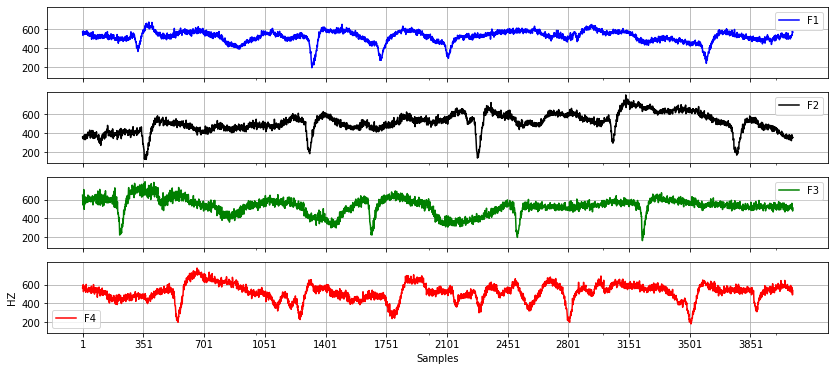

                       Subject 1


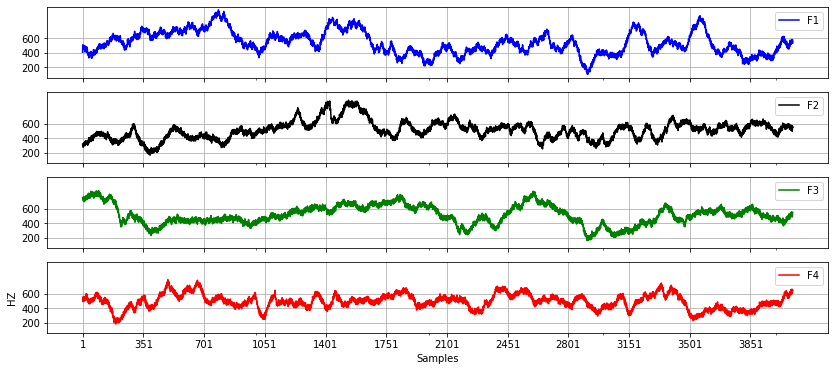

                       Subject 2


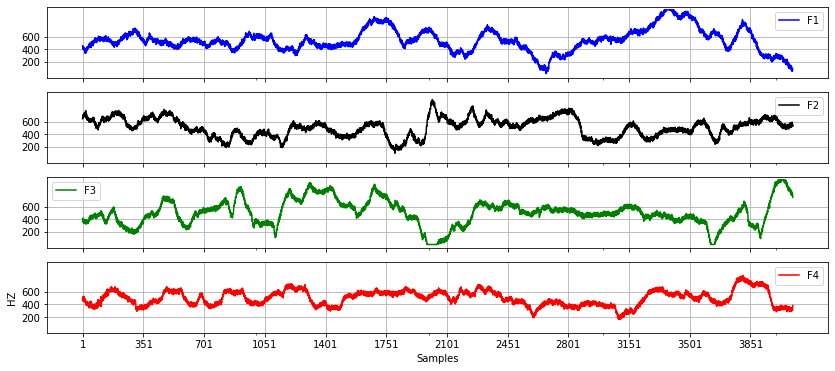

                       Subject 3


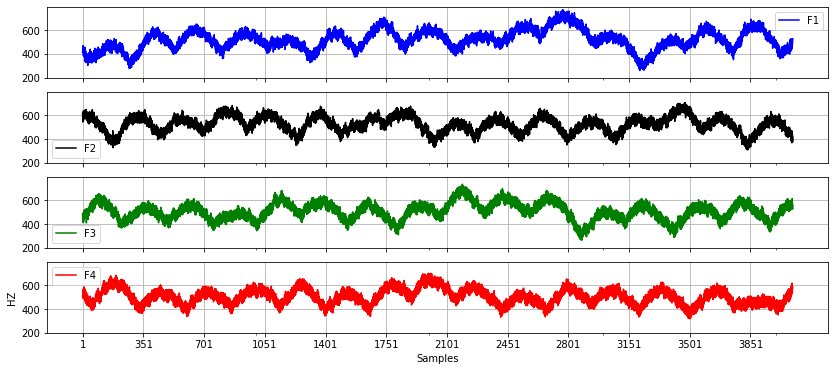

                       Subject 4


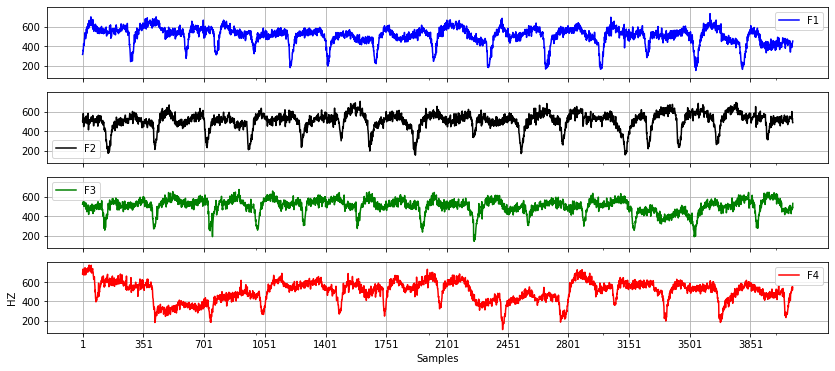

                       Subject 5


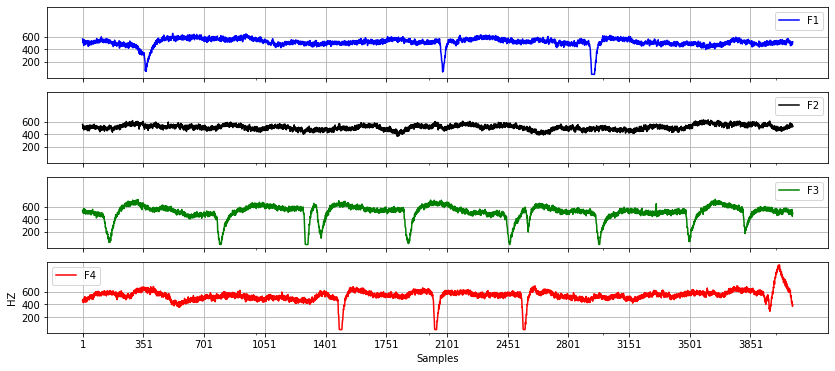

                       Subject 6


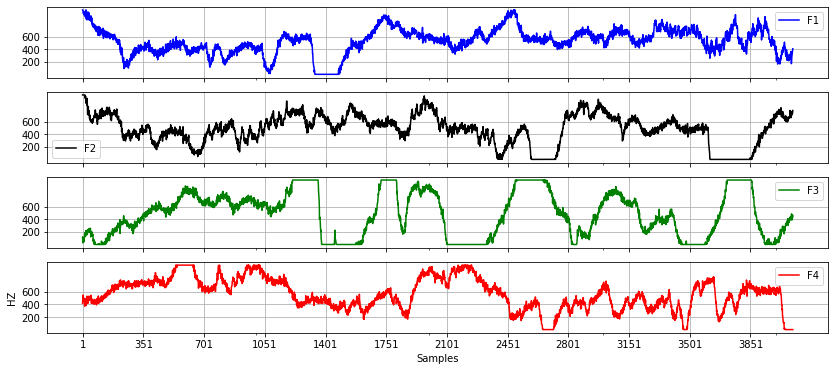

                       Subject 7


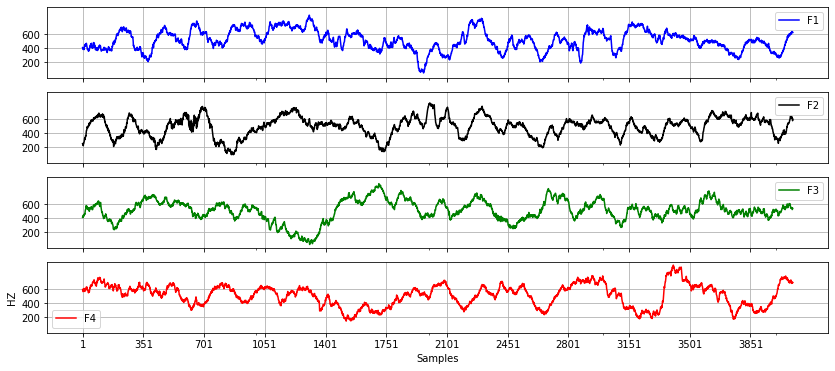

                       Subject 8


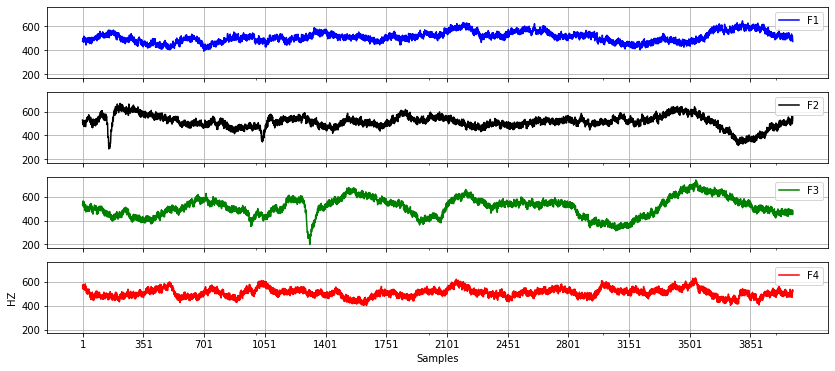

                       Subject 9


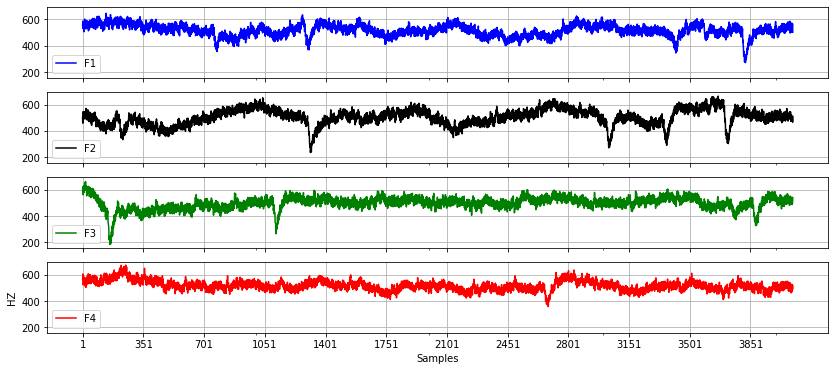

                       Subject 10


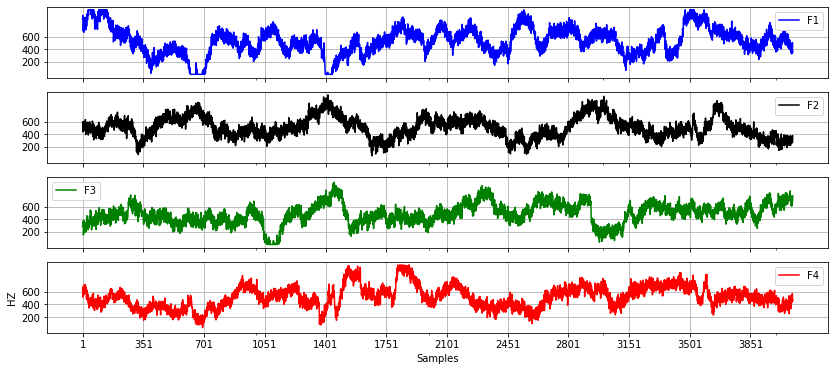

                       Subject 11


In [94]:

for i in range(0,len(list)):
    list[i].plot(kind="line", subplots=True,layout=(4,1),sharey=True,alpha=1,figsize=(14,6),grid=True, sharex=True,color=['blue','black','green','red'])
    plt.xticks([1,351,701,1051,1401,1751,2101,2451,2801,3151,3501,3851],alpha=1)
    plt.yticks([200,400,600])
    plt.xlabel('Samples',alpha=1,color='k')
    plt.ylabel('HZ',alpha=1,color='k')
    plt.show()
    print("                       Subject",i+1)
    
    

Each one of them displays data contained in one of
the .csv files. 

In detail, each plot contains four subplots. Each subplot displays the values for one
of the considered frequencies. 

Hence, each subplot is characterized by the number of samples
on the x-axis and the frequency values on y-axis.

### Now We are reading combined data.

In [95]:
data=pd.read_csv('Combined.csv')

In [96]:
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,F1,571,556,537,561,583,547,550,571,555,...,531,529,532,533,541,539,561,583,575,567
1,F2,359,347,366,365,343,339,360,358,368,...,355,322,357,375,385,367,354,349,361,356
2,F3,646,601,542,552,629,604,631,705,551,...,532,499,502,549,560,521,508,518,478,508
3,F4,566,581,558,599,599,525,547,549,545,...,529,516,532,572,571,518,517,491,498,537
4,F1,410,513,511,492,472,451,487,498,499,...,564,557,529,538,586,572,560,549,532,576


In [97]:
#we have Target variable in string so we have to convert it into numeric.
data['Target']=data['Target'].replace(['F1','F2','F3','F4'],[0,1,2,3])

In [98]:
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,571,556,537,561,583,547,550,571,555,...,531,529,532,533,541,539,561,583,575,567
1,1,359,347,366,365,343,339,360,358,368,...,355,322,357,375,385,367,354,349,361,356
2,2,646,601,542,552,629,604,631,705,551,...,532,499,502,549,560,521,508,518,478,508
3,3,566,581,558,599,599,525,547,549,545,...,529,516,532,572,571,518,517,491,498,537
4,0,410,513,511,492,472,451,487,498,499,...,564,557,529,538,586,572,560,549,532,576


In [99]:
data.to_csv('data.csv')

In [100]:
#seperating independent and dependent features of data set. 

X=data.drop('Target', axis=1)
y=data['Target']

In [101]:
#splitting into train test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=70)

### Robust scaler

In [102]:
# Robust scaler for scaling data.
rob =RobustScaler()
X_train = rob.fit_transform(X_train)
X_test = rob.transform(X_test)

### We are going to build models on traning data and checking the accuracy of test data.

#### Random Forest

In [103]:
rf = RandomForestClassifier(n_estimators = 20, min_samples_split=10)
rf.fit(X_train, y_train.ravel())
y_predict_train = rf.predict(X_train)
y_predict_test = rf.predict(X_test)
accuracy_train = accuracy_score(y_train, y_predict_train)*100
accuracy_test = accuracy_score(y_test, y_predict_test)*100

print("Accuracy train :", accuracy_train)
print("Accuracy test :", accuracy_test)

Accuracy train : 100.0
Accuracy test : 33.33333333333333


#### Logistic Regression

In [104]:
lg=LogisticRegression(C=0.009,multi_class="multinomial",class_weight=None, dual=False,fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=5, n_jobs=None,penalty='l2', random_state=1000, solver='saga', tol=0.0001,
                   verbose=1, warm_start=False)
lg.fit(X_train, y_train.ravel())
y_predict_train = lg.predict(X_train)
y_predict_test = lg.predict(X_test)
accuracy_train_ = accuracy_score(y_train, y_predict_train)*100
accuracy_test_ = accuracy_score(y_test, y_predict_test)*100

print("Accuracy train :", accuracy_train_)
print("Accuracy test :", accuracy_test_)

max_iter reached after 0 seconds
Accuracy train : 85.71428571428571
Accuracy test : 44.44444444444444


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\anil kumar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


#### ExtraTree

In [105]:
ET=ExtraTreesClassifier()
ET.fit(X_train,y_train.ravel())
y_predict_train = ET.predict(X_train)
y_predict_test = ET.predict(X_test)
accuracy_train_ = accuracy_score(y_train, y_predict_train)*100
accuracy_test_ = accuracy_score(y_test, y_predict_test)*100

print("Accuracy train :", accuracy_train_)
print("Accuracy test :", accuracy_test_)

Accuracy train : 100.0
Accuracy test : 33.33333333333333


#### Decision tree

In [106]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_predict_train = DT.predict(X_train)
y_predict_test = DT.predict(X_test)
accuracy_train_ = accuracy_score(y_train, y_predict_train)*100
accuracy_test_ = accuracy_score(y_test, y_predict_test)*100

print("Accuracy train :", accuracy_train_)
print("Accuracy test :", accuracy_test_)

Accuracy train : 100.0
Accuracy test : 11.11111111111111


#### XGBOOST

In [107]:
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_predict_train = xg.predict(X_train)
y_predict_test = xg.predict(X_test)
accuracy_train_ = accuracy_score(y_train, y_predict_train)*100
accuracy_test_ = accuracy_score(y_test, y_predict_test)*100

print("Accuracy train :", accuracy_train_)
print("Accuracy test :", accuracy_test_)

Accuracy train : 100.0
Accuracy test : 55.55555555555556


#### BaggingClassifires

In [108]:
BC=BaggingClassifier()
BC.fit(X_train,y_train)
y_predict_train = BC.predict(X_train)
y_predict_test = BC.predict(X_test)
accuracy_train_ = accuracy_score(y_train, y_predict_train)*100
accuracy_test_ = accuracy_score(y_test, y_predict_test)*100

print("Accuracy train :", accuracy_train_)
print("Accuracy test :", accuracy_test_)

Accuracy train : 97.14285714285714
Accuracy test : 22.22222222222222






#### Out of above only xgboost classifires gives us more accuracy.

we now we use only xgboost model for further also try Recursive Feature
Eilimination method to achive good accuracy.

### Recursive Feature Eilimination

In [ ]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=1000)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_test_selected = select.transform(X_test)
model = RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(model.score(X_test,y_test)))

model.fit(X_train_selected,y_train)
print("Scoree with selected features: {:,.3f}".format(model.score(X_test_selected,y_test)))


In [ ]:
model = XGBClassifier()
model.fit(X_train_selected,y_train)
y_pred_XG=model.predict(X_test_selected)
y_pred=model.predict(X_train_selected)
xg_ac=accuracy_score(y_test,y_pred_XG)
xg_ac2=accuracy_score(y_train,y_pred)
print("Testing:",xg_ac)
print("Traning",xg_ac2)

In [ ]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=70),n_features_to_select=2000)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_test_selected = select.transform(X_test)
model = RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(model.score(X_test,y_test)))

model.fit(X_train_selected,y_train)
print("Scoree with selected features: {:,.3f}".format(model.score(X_test_selected,y_test)))


In [ ]:
model = XGBClassifier()
model.fit(X_train_selected,y_train)
y_pred_XG=model.predict(X_test_selected)
y_pred=model.predict(X_train_selected)
xg_ac=accuracy_score(y_test,y_pred_XG)
xg_ac2=accuracy_score(y_train,y_pred)
print("Testing:",xg_ac)
print("Traning",xg_ac2)

In [ ]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=3000)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_test_selected = select.transform(X_test)
model = RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(model.score(X_test,y_test)))

model.fit(X_train_selected,y_train)
print("Scoree with selected features: {:,.3f}".format(model.score(X_test_selected,y_test)))


In [ ]:
model = XGBClassifier()
model.fit(X_train_selected,y_train)
y_pred_XG=model.predict(X_test_selected)
y_pred=model.predict(X_train_selected)
xg_ac=accuracy_score(y_test,y_pred_XG)
xg_ac2=accuracy_score(y_train,y_pred)
print("Testing:",xg_ac)
print("Traning",xg_ac2)

In [ ]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=42),n_features_to_select=4000)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_test_selected = select.transform(X_test)
model = RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(model.score(X_test,y_test)))

model.fit(X_train_selected,y_train)
print("Scoree with selected features: {:,.3f}".format(model.score(X_test_selected,y_test)))


In [ ]:
model = XGBClassifier()
model.fit(X_train_selected,y_train)
y_pred_XG=model.predict(X_test_selected)
y_pred=model.predict(X_train_selected)
xg_ac=accuracy_score(y_test,y_pred_XG)
xg_ac2=accuracy_score(y_train,y_pred)
print("Testing:",xg_ac)
print("Traning",xg_ac2)

#### No of features =4000 given us better result so we use it for best parameter searching of XGBOOST.
we can do this with the help of RandomizedSearchCV
### RandomizedSearchCV

In [ ]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
g=RandomizedSearchCV(XGBClassifier(),params,cv=5)

In [ ]:
g.fit(X_train_selected, y_train.ravel())

In [ ]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

In [ ]:
m=XGBClassifier(colsample_bytree= 0.5, gamma= 0.2, learning_rate=0.005, max_depth=5, min_child_weight= 1)
m.fit(X_train_selected,y_train.ravel())
y_predict_train = m.predict(X_train_selected)
y_predict_test = m.predict(X_test_selected)
accuracy_train = accuracy_score(y_train, y_predict_train)*100
accuracy_test = accuracy_score(y_test, y_predict_test)*100

print("Accuracy train :", accuracy_train)
print("Accuracy test :", accuracy_test)

In [ ]:
m=XGBClassifier(colsample_bytree= 0.5, gamma= 0.4, learning_rate=0.1, max_depth=15, min_child_weight= 1)
m.fit(X_train_selected,y_train.ravel())
y_predict_train = m.predict(X_train_selected)
y_predict_test = m.predict(X_test_selected)
accuracy_train = accuracy_score(y_train, y_predict_train)*100
accuracy_test = accuracy_score(y_test, y_predict_test)*100

print("Accuracy train :", accuracy_train)
print("Accuracy test :", accuracy_test)

In [ ]:
m=XGBClassifier(colsample_bytree= 0.5, gamma= 0.4, learning_rate=0.1, max_depth=15, min_child_weight= 1)
m.fit(X_train_selected,y_train.ravel())
y_predict_train = m.predict(X_train_selected)
y_predict_test = m.predict(X_test_selected)
accuracy_train = accuracy_score(y_train, y_predict_train)*100
accuracy_test = accuracy_score(y_test, y_predict_test)*100

print("Accuracy train :", accuracy_train)
print("Accuracy test :", accuracy_test)

In [ ]:
m=XGBClassifier(colsample_bytree= 0.3, gamma= 0.2, learning_rate=0.05, max_depth=5, min_child_weight= 3)
m.fit(X_train_selected,y_train.ravel())
y_predict_train = m.predict(X_train_selected)
y_predict_test = m.predict(X_test_selected)
accuracy_train = accuracy_score(y_train, y_predict_train)*100
accuracy_test = accuracy_score(y_test, y_predict_test)*100

print("Accuracy train :", accuracy_train)
print("Accuracy test :", accuracy_test)

#### Greate we are getting best accurcy with this param.
By using RandomizedSearchCV we get best parameters 
by using that we are getting accuracy up to  66 %.

param={colsample_bytree= 0.3, gamma= 0.2, learning_rate=0.05, max_depth=5, min_child_weight= 3}

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
print(confusion_matrix(y_test,y_predict_test))
print(classification_report(y_test,y_predict_test))
print(classification_report(y_train,y_predict_train))

data = {'y_Actual':np.array(y_test),
        'y_Predicted':y_predict_test}

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)
plt.show()


In [ ]:
#Cross-Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(m,X_train_selected,y_train, cv=5)
print("Avg accuracy: {}".format(scores.mean()))    
print("Standard deviation of accuracy: {}".format(scores.std()))
print(pd.Series(scores).describe())

### Observations:
From the above output of cross validation we can see that standard deviation between scores is high.

Because of that every time it gives us different accuracy. 

so we can say still xgboost giving good accuracy but variance of accuracy is high which is not good for us.